DynaFlow is a new steady-state simulation tool that aims at calculating the steady-state point by using a simplified time-domain simulation, guaranteeing the correctness of the solution found. 
This tutorial aims at illustrating the interest of Dynaflow compared to a fully static simulator.

The system is made of a generator, two phase shifter transformers in parallel, a transformer, five lines and a load.

We simulate the opening of a line at t = 30s with different scenarios on the time constants of the phase shifters:
1) The two phase shifters have the following time constants: t1st = 40s and tNext = 20s.
2) One phase shifter has the following time constants: t1st = 20s and tNext= 10s, the other one: t1st = 40s and tNext = 20s.

## 1/ Dynaflow installing

**For Windows**
Follow [this link](https://github.com/dynawo/dynaflow-launcher/?tab=readme-ov-file#dynaflow-launcher-distribution) to install Dynaflow-launcher.

**For Linux**
You can launch the following commands to download the latest distribution:


In [ ]:
!curl -L $(curl -s -L -X GET https://api.github.com/repos/dynawo/dynaflow-launcher/releases/latest | grep "DynaFlowLauncher_Linux" | grep url | cut -d '"' -f 4) -o DynaflowLauncher_Linux_latest.zip
!unzip -o -q DynaflowLauncher_Linux_latest.zip
!./dynaflow-launcher/dynaflow-launcher.sh help

## 2/ PowSyBl installing and setting of default parameter (path to dynaflow_launcher)

In [ ]:
CONFIG_DIR="$HOME/.itools"
!mkdir "$CONFIG_DIR"
![ -e "$CONFIG_DIR/config.yml" ] && mv "$CONFIG_DIR/config.yml" "$CONFIG_DIR/config.old.yml"
!cp data/dynaflow/config.yml "$CONFIG_DIR/config.yml"
!sed -i "s|WORKING_DIR|$(pwd)|g" "$CONFIG_DIR/config.yml"
!cat "$CONFIG_DIR/config.yml"

## 3/ Notebook

In [3]:
import pypowsybl.network as pn
import pypowsybl.loadflow as lf
import os.path

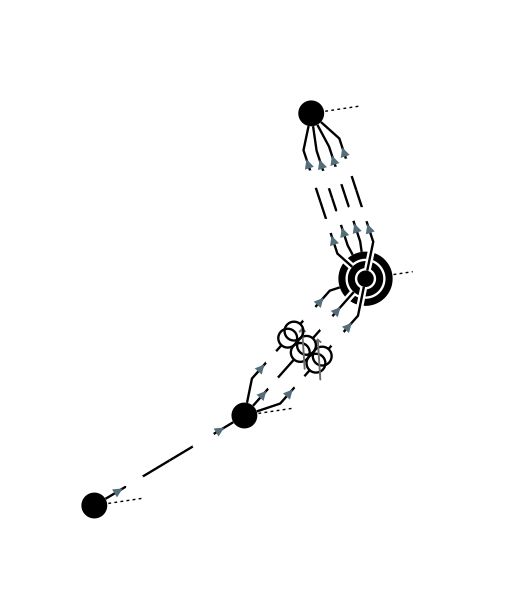

In [4]:
# Load initial situation
network_file = 'data/dynaflow/PhaseShifters.iidm'
network = pn.load(network_file)
network.get_network_area_diagram()

In [5]:
# Initial tap positions
network.get_phase_tap_changers()

,side,tap,solved_tap_position,low_tap,high_tap,step_count,oltc,regulating,regulation_mode,regulation_value,target_deadband,regulating_bus_id
id,,,,,,,,,,,,
_BUS____5-BUS____6-1_PS,,13,NaN,1,25,25,True,True,CURRENT_LIMITER,770.0,0.0,_BUS____5_VL_0
_BUS____5-BUS____7-2_PS,,13,NaN,1,25,25,True,True,CURRENT_LIMITER,770.0,0.0,_BUS____5_VL_0


In [6]:
# 1st Dynaflow simulation: identical time constants (defined in file "setting-1.xml")
p = lf.Parameters(provider_parameters={'svcRegulationOn' : 'true',
                                       'shuntRegulationOn' : 'true',
                                       'automaticSlackBusOn' : 'true',
                                       'dsoVoltageLevel' : '63.0',
                                       'activePowerCompensation' : 'P',
                                       'settingPath' : os.getcwd() + '/data/dynaflow/setting-1.xml',
                                       'assemblingPath' : os.getcwd() + '/data/dynaflow/assembling.xml',
                                       'stopTime' : '300',
                                       'chosenOutputs' : 'STEADYSTATE, LOSTEQ, TIMELINE, CONSTRAINTS',
                                       'timeStep' : '2.6'})
lf.run_ac(network, parameters=p, provider='DynaFlow')
network1 = network

In [7]:
# Final tap positions after N-1 simulation with identical time constants
network1.get_phase_tap_changers()

,side,tap,solved_tap_position,low_tap,high_tap,step_count,oltc,regulating,regulation_mode,regulation_value,target_deadband,regulating_bus_id
id,,,,,,,,,,,,
_BUS____5-BUS____6-1_PS,,13,18,1,25,25,True,True,CURRENT_LIMITER,770.0,0.0,_BUS____5_VL_0
_BUS____5-BUS____7-2_PS,,13,18,1,25,25,True,True,CURRENT_LIMITER,770.0,0.0,_BUS____5_VL_0


In [8]:
# 2nd Dynaflow simulation: different time constants (defined in file "setting-2.xml")
network = pn.load(network_file)
p = lf.Parameters(provider_parameters={'svcRegulationOn' : 'true',
                                       'shuntRegulationOn' : 'true',
                                       'automaticSlackBusOn' : 'true',
                                       'dsoVoltageLevel' : '63.0',
                                       'activePowerCompensation' : 'P',
                                       'settingPath' : os.getcwd() + '/data/dynaflow//setting-2.xml',
                                       'assemblingPath' : os.getcwd() + '/data/dynaflow/assembling.xml',
                                       'stopTime' : '300',
                                       'chosenOutputs' : 'STEADYSTATE, LOSTEQ, TIMELINE, CONSTRAINTS',
                                       'timeStep' : '2.6'})
lf.run_ac(network, parameters=p, provider='DynaFlow')
network2 = network

In [9]:
# Final tap positions after N-1 simulation with different time constants
network2.get_phase_tap_changers()

,side,tap,solved_tap_position,low_tap,high_tap,step_count,oltc,regulating,regulation_mode,regulation_value,target_deadband,regulating_bus_id
id,,,,,,,,,,,,
_BUS____5-BUS____6-1_PS,,13,18,1,25,25,True,True,CURRENT_LIMITER,770.0,0.0,_BUS____5_VL_0
_BUS____5-BUS____7-2_PS,,13,17,1,25,25,True,True,CURRENT_LIMITER,770.0,0.0,_BUS____5_VL_0


In [10]:
print('Transits in transformers with identical time constants:')
network1.get_2_windings_transformers()[['i1','i2']]

Transits in transformers with identical time constants:


,i1,i2
id,,
_BUS____5-BUS____6-1_PS,233.952319,39.468929
_BUS____5-BUS____7-2_PS,233.952319,39.468929
_BUS____5-BUS____8-1_PT,383.855389,64.758329


In [11]:
print('\nTransits in transformers with different time constants:')
network2.get_2_windings_transformers()[['i1','i2']]


Transits in transformers with different time constants:


,i1,i2
id,,
_BUS____5-BUS____6-1_PS,223.959508,37.783092
_BUS____5-BUS____7-2_PS,253.934704,42.840058
_BUS____5-BUS____8-1_PT,373.860516,63.072144


The currents in both phase shifters are compared in both cases. Depending on the time constants of the phase shifter, the steady-state after the event is different.
This cannot be captured by a fully static simulator, in which all the phase shifters are activated at the same time with an external loop.